# Anova on the Iris Dataset

Today we will have a look at Anova on the Iris Dataset in R.<br>
R is a wonderful language for statistics and I will show how we can perform ANOVA in R by just a single line of code.<br>
This will perhaps give you an idea of how powerfulr R really is.<br>

## The Theory for ANOVA

Before we start ANOVA lets us see what its used for as well as a small working example.<br>
ANOVA or Analysis of Variance is used to compare the means of groups across a common varable.<br>
It tells us if the means of two or more groups are significantl different from one another.<br>
It is done so by analyzing the variances hence the name ANOVA or analysis of variance.<br>
This method was developed by Ronald Fisher

### Calculations involved in ANOVA

The steps invovled in ANOVA are as given below:-

    1) First we define the null an alternate hypothesis.
  
       The null hypothesis is that the means are equal between the groups:-



$$H_o : \mu_1 = \mu_2 = \mu_3 = \mu_4 = ..... \mu_L$$


       The alternate Hypothesis is given as the means are not equal:-
         
$$H_a : \mu_1 \neq \mu_m$$

     2) Once this is done we calculate the Sum of Squares.
     
        This particualar calculation is done for values between the groups as well as for values within the groups.
        
        The calculation for within the groups is as follows if there are 
        
$$SS_{within} = \sum_{i=0}^n ( x_{i,1} - \overline x_{1})^2 + \sum_{i=0}^n ( x_{i,2} - \overline x_{2})^2 + .....                  \sum_{i=0}^n ( x_{i,k} - \overline x_{k})^2
$$ 
       
        This assumes that there are k different groups and n examples per group.
        
            
        This can be written in a more compact way as:-
   
   $$SS_{within} = \sum_{j=0}^k \sum_{i=0}^n ( x_{i,j} - \overline x_{j})^2$$ 
   
   
      3) Lets have a look Sum of Squares between the groups.
       
       For this we need to compute a quantitiy called total mean.
       Its calculation is done as below
        
        The mean of group 1 is 
$$ 
     \overline x_{1} 
$$ 

        The mean of group 2 is
$$ 
     \overline x_{2} 
$$  

       and so on.
       
       The total mean is then computed as 
       
$$ \overline x_T =  \sum_{j=0}^k  \frac{\overline x_{j}}{k} $$

      
       The sum of squares between the groups is then calculated as:-
       
$$ SS_{between} = n_1(\overline x_{1} - \overline x_T )^2 + n_2(\overline x_{2} - \overline x_T )^2 + ...... n_k(\overline x_{k} - \overline x_T )^2 $$       
       
       
$$ SS_{between} =  \sum_{j=0}^k n_j(\overline x_{j} - \overline x_T )^2  $$      

       Here n is the number of samples in the group.


    4) Degrees of Freedom:-
    
          The degrees of freedom between groups is calclated as below:-
          
$$  dof_{ between} = k-1 $$
     
          The degrees of freedom within groups is calclated as below:-

$$  dof_{ within} = n-k $$
          
          n is the total number of samples.
          
          
      5) F value
      
           The final step is to calculate the F value if it is more than the critical value null hypothesis is rejected
           
           First we calculate mean squares within and between as below:-
           
$$  MS_{ between} = \frac{SS_{ between}}{dof_{ between}}      $$           
           
$$  MS_{ within} = \frac{SS_{ within}}{dof_{ within}}      $$               
           
           The F value is then calculated as :- 
           
$$  F_{ value} = \frac{MS_{ between}}{MS_{ within}}      $$           

          
We will now look at an exapmle before moving on to the Iris DataSet          


 
 Lets tak a fictous data set with marks of 5 students in English , Maths and History.
<table style="width:50%">
  <tr>
    <th>Student No</th>
    <th>English</th>
    <th>Maths</th> 
    <th>History</th>
  </tr>
  <tr>
    <td>1</td>  
    <td>56</td>
    <td>78</td> 
    <td>87</td>
  </tr>
  <tr>
    <td>2</td>  
    <td>65</td>
    <td>85</td> 
    <td>73</td>
  </tr>  
  <tr>
    <td>3</td>  
    <td>53</td>
    <td>91</td> 
    <td>31</td>
  </tr>
  <tr>
    <td>4</td>  
    <td>67</td>
    <td>94</td> 
    <td>88</td>
  </tr>  
  <tr>
    <td>5</td>  
    <td>39</td>
    <td>57</td> 
    <td>72</td>
  </tr>    
    
</table>

Here we have 3 groups and a total of 15 samples

$$ k = 3 $$
$$ n = 15 $$

The degrees of freedom are 

$$  dof_{ between} = 2 $$
$$  dof_{ within} = 12 $$

The means are computed as:-

$$  \overline x_{ English} = 56 $$
$$  \overline x_{ Maths} = 81 $$
$$  \overline x_{ History} = 70.2 $$

The total mean is:- 

$$  \overline x_{ T} = 69 $$

The sum of squares is:- 

$$  SS_{ between} = 5(69-56)^2+5(69-81)^2+5(69-70.2)^2 = 1572.2 $$
$$  SS_{ within} = (56-56)^2+(65-56)^2+(69-70.2)^2 + .. (72-70.2)^2  = 3516.8 $$

The mean sum of squares is:-

$$  MS_{ between} = 5(69-56)^2+5(69-81)^2+5(69-70.2)^2 = 786 $$
$$  MS_{ within} = (56-56)^2+(65-56)^2+(69-70.2)^2 + .. (72-70.2)^2  = 293 $$

The F value is :- 
$$  F_{ value} = 2.68  $$

The F critical is :- 
$$  F_{ critical} = 3.89  $$

     Here F critical is higher and so we do not rejet the null hypothesis 

Lets visualize this in R

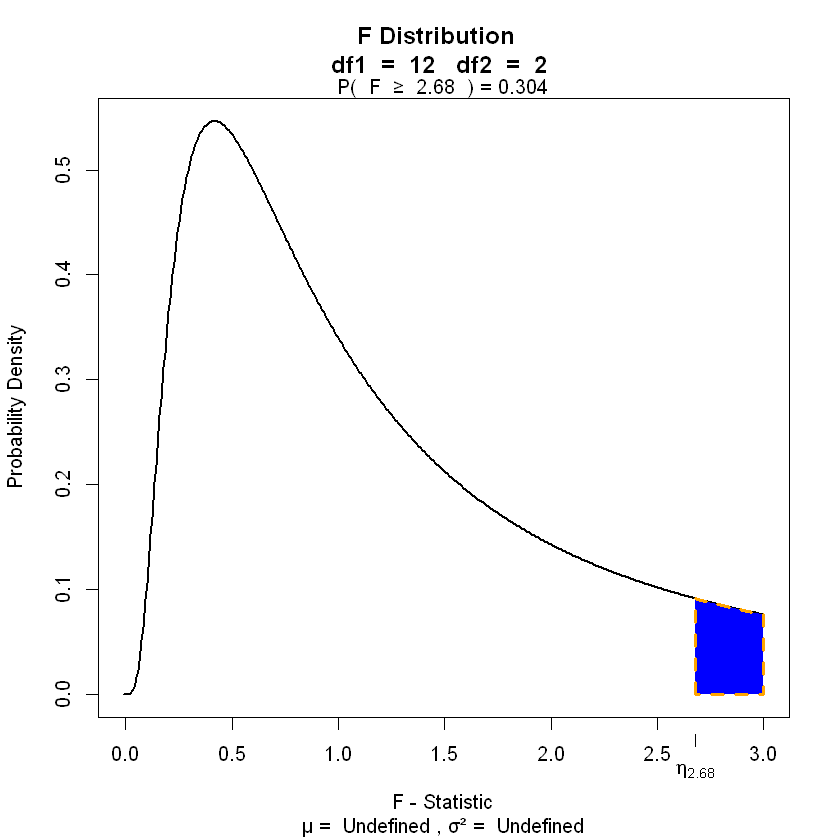

In [9]:
library('visualize')
visualize.f(stat = 2.68 , df1 = 12 , df2 = 2 ,section = 'upper')

Lets start with ANOVA on the iris dataset by loading the necessary libraries.
We will first write the code from scratch and the check out R's inbuilt implementation of ANOVA



In [10]:
library('datasets')
library('dplyr')

As we see below the IRIS data set consists of a total of 4 attributes

In [11]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


The averages are displayed below calculated for every attribute and species

In [12]:
iris_agg <- aggregate(iris[,1:4],by=list(iris$Species),mean)
df_iris_agg <- data.frame(iris_agg)
colnames(df_iris_agg)[1] <- "Species"
colnames(df_iris_agg)[2] <- "Sepal.Length.Agg"
colnames(df_iris_agg)[3] <- "Sepal.Width.Agg"
colnames(df_iris_agg)[4] <- "Petal.Length.Agg"
colnames(df_iris_agg)[5] <- "Petal.Width.Agg"

df_iris_agg

Species,Sepal.Length.Agg,Sepal.Width.Agg,Petal.Length.Agg,Petal.Width.Agg
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [13]:
df_iris_merge <- merge(iris, df_iris_agg , by = "Species")
head(df_iris_merge)

Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Sepal.Length.Agg,Sepal.Width.Agg,Petal.Length.Agg,Petal.Width.Agg
setosa,5.1,3.5,1.4,0.2,5.006,3.428,1.462,0.246
setosa,4.9,3.0,1.4,0.2,5.006,3.428,1.462,0.246
setosa,4.7,3.2,1.3,0.2,5.006,3.428,1.462,0.246
setosa,4.6,3.1,1.5,0.2,5.006,3.428,1.462,0.246
setosa,5.0,3.6,1.4,0.2,5.006,3.428,1.462,0.246
setosa,5.4,3.9,1.7,0.4,5.006,3.428,1.462,0.246


In [14]:
df_ss_within <-  data.frame(cbind(df_iris_merge[1],(df_iris_merge[2]-df_iris_merge[6])^2
                                                  ,(df_iris_merge[3]-df_iris_merge[7])^2
                                                  ,(df_iris_merge[4]-df_iris_merge[8])^2
                                                  ,(df_iris_merge[5]-df_iris_merge[9])^2
                                  ))
                            

In [15]:
head(df_ss_within)

Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
setosa,0.008836,0.005184,0.003844,0.002116
setosa,0.011236,0.183184,0.003844,0.002116
setosa,0.093636,0.051984,0.026244,0.002116
setosa,0.164836,0.107584,0.001444,0.002116
setosa,0.000036,0.029584,0.003844,0.002116
setosa,0.155236,0.222784,0.056644,0.023716


In the dataFrame $SS_{within}$ we have the sum of squares within the groups.

In [16]:
ss_within <- cbind(sum(df_ss_within[2]),sum(df_ss_within[3]),sum(df_ss_within[4]),sum(df_ss_within[5]))
colnames(ss_within) <- colnames(df_ss_within[2:ncol(df_ss_within)])
ss_within

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
38.9562,16.962,27.2226,6.1566


In [17]:
total_iris_agg <- colMeans(x=df_iris_agg[,2:5], na.rm = TRUE)
total_iris_agg <- t(total_iris_agg)
total_iris_agg

Sepal.Length.Agg,Sepal.Width.Agg,Petal.Length.Agg,Petal.Width.Agg
5.843333,3.057333,3.758,1.199333


In [18]:
df_means_between <- merge(df_iris_agg, total_iris_agg , by = NULL)
df_means_between

Species,Sepal.Length.Agg.x,Sepal.Width.Agg.x,Petal.Length.Agg.x,Petal.Width.Agg.x,Sepal.Length.Agg.y,Sepal.Width.Agg.y,Petal.Length.Agg.y,Petal.Width.Agg.y
setosa,5.006,3.428,1.462,0.246,5.843333,3.057333,3.758,1.199333
versicolor,5.936,2.770,4.260,1.326,5.843333,3.057333,3.758,1.199333
virginica,6.588,2.974,5.552,2.026,5.843333,3.057333,3.758,1.199333


In [19]:
df_means_between_comp <- merge(df_means_between, count(iris,Species) , by = 'Species') 
df_means_between_comp

Species,Sepal.Length.Agg.x,Sepal.Width.Agg.x,Petal.Length.Agg.x,Petal.Width.Agg.x,Sepal.Length.Agg.y,Sepal.Width.Agg.y,Petal.Length.Agg.y,Petal.Width.Agg.y,n
setosa,5.006,3.428,1.462,0.246,5.843333,3.057333,3.758,1.199333,50
versicolor,5.936,2.770,4.260,1.326,5.843333,3.057333,3.758,1.199333,50
virginica,6.588,2.974,5.552,2.026,5.843333,3.057333,3.758,1.199333,50


In [20]:
df_ss_between <-  data.frame(cbind(df_means_between_comp[1],((df_means_between_comp[2]-df_means_between_comp[6])^2)*df_means_between_comp[10]
                                                  ,((df_means_between_comp[3]-df_means_between_comp[7])^2)*df_means_between_comp[10]
                                                  ,((df_means_between_comp[4]-df_means_between_comp[8])^2)*df_means_between_comp[10]
                                                  ,((df_means_between_comp[5]-df_means_between_comp[9])^2)*df_means_between_comp[10]
                                  ))
colnames(df_ss_between)[2] <- "Sepal.Length.Agg"
colnames(df_ss_between)[3] <- "Sepal.Width.Agg"
colnames(df_ss_between)[4] <- "Petal.Length.Agg"
colnames(df_ss_between)[5] <- "Petal.Width.Agg"
df_ss_between

Species,Sepal.Length.Agg,Sepal.Width.Agg,Petal.Length.Agg,Petal.Width.Agg
setosa,35.0563556,6.8696889,263.5808,45.4422222
versicolor,0.4293556,4.1280222,12.6002,0.8022222
virginica,27.7264222,0.3472222,160.9218,34.1688889


In the dataFrame $SS_{between}$ we have the sum of squares between the groups.

In [21]:
ss_between <- cbind(sum(df_ss_between[2]),sum(df_ss_between[3]),sum(df_ss_between[4]),sum(df_ss_between[5]))
colnames(ss_between) <- colnames(df_ss_between[2:ncol(df_ss_between)])
ss_between

Sepal.Length.Agg,Sepal.Width.Agg,Petal.Length.Agg,Petal.Width.Agg
63.21213,11.34493,437.1028,80.41333


In [22]:
dof_between=nrow(unique(iris[5]))-1
print(paste('Degrees of freedom between the groups ',dof_between))
dof_within=nrow(iris)-nrow(unique(iris[5]))
print(paste('Degrees of freedom within the groups ',dof_within))

[1] "Degrees of freedom between the groups  2"
[1] "Degrees of freedom within the groups  147"


In [23]:
MS_between=ss_between/dof_between
MS_between
MS_within=ss_within/dof_within
MS_within

Sepal.Length.Agg,Sepal.Width.Agg,Petal.Length.Agg,Petal.Width.Agg
31.60607,5.672467,218.5514,40.20667


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0.2650082,0.1153878,0.1851878,0.04188163


In [24]:
f_stat=MS_between/MS_within
f_stat

Sepal.Length.Agg,Sepal.Width.Agg,Petal.Length.Agg,Petal.Width.Agg
119.2645,49.16004,1180.161,960.0071


We finally have the F values which are then compared to critical values.
Lets move on to R's iternal implementation for the same 

In [25]:
Sepal.Length.aov <- aov(formula = iris$Sepal.Length ~ iris$Species, data = iris)
summary(Sepal.Length.aov)

              Df Sum Sq Mean Sq F value Pr(>F)    
iris$Species   2  63.21  31.606   119.3 <2e-16 ***
Residuals    147  38.96   0.265                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [26]:
Sepal.Width.aov <- aov(formula = iris$Sepal.Width ~ iris$Species, data = iris)
summary(Sepal.Width.aov)

              Df Sum Sq Mean Sq F value Pr(>F)    
iris$Species   2  11.35   5.672   49.16 <2e-16 ***
Residuals    147  16.96   0.115                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [27]:
Petal.Length.aov <- aov(formula = iris$Petal.Length ~ iris$Species, data = iris)
summary(Petal.Length.aov)

              Df Sum Sq Mean Sq F value Pr(>F)    
iris$Species   2  437.1  218.55    1180 <2e-16 ***
Residuals    147   27.2    0.19                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [28]:
Petal.Width.aov <- aov(formula = iris$Petal.Width ~ iris$Species, data = iris)
summary(Petal.Width.aov)

              Df Sum Sq Mean Sq F value Pr(>F)    
iris$Species   2  80.41   40.21     960 <2e-16 ***
Residuals    147   6.16    0.04                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

We thus see that p value is very small in all the attributes.
Thus we reject the null hypothesis for all attributes and state there is significant differnce between the groups.